<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка пропусков</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователя каждого региона</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br>
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.<br>
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from scipy import stats as st
import warnings

data= pd.read_csv('games.csv')
#изучаем таблицу
display(data.head(10))
print(data.info()) 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [2]:
#Пhиведем названия столбцов к нижнему регистру
data.columns=data.columns.str.lower()
data.columns
display(data.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Хорошее решение с изменением регистра
</div>


In [3]:
#Исследуем таблицу.Посмотрим максимальные значения числовых данныъ
data[[ 'year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']].describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<i>Количественные данные выглядят адекватно. В каждом рассматриваемом регионе топовые игры продаются многократно выше медианы или среднего. Хотя такая ситуация похожа на выброс, в случае шоу-бизнеса, или индустрии развлечений такая ситуация вполне возомжно, когда супер-хиты собирают огромные продажи</i>

<AxesSubplot:>

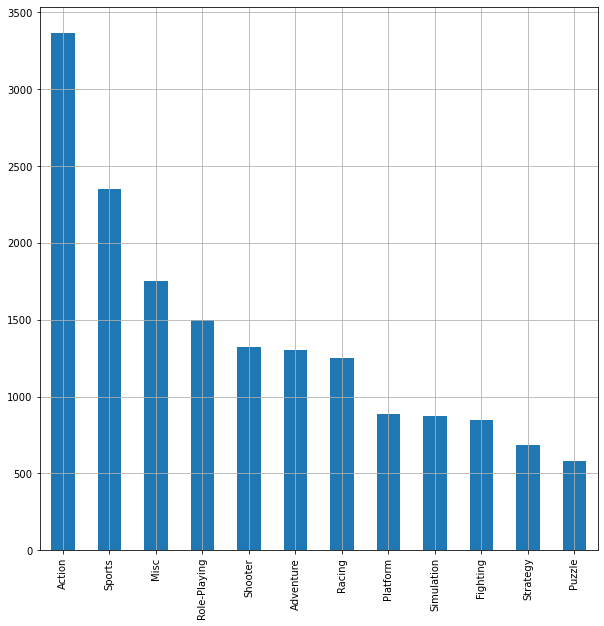

In [4]:
#Посмоторим уникальные жанры
#data['genre'].value_counts().plot(kind='pie', figsize=(10, 10))
data['genre'].value_counts().plot(kind='bar', figsize=(10, 10),grid = True)

<i>Больше всего в датасете игр жанра Action, Sports и RPG</i>

<AxesSubplot:>

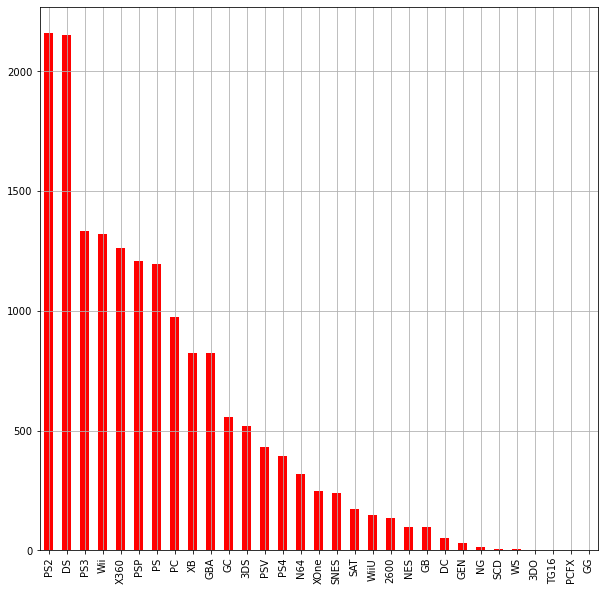

In [5]:
data['platform'].value_counts().plot(kind='bar', figsize=(10, 10),grid = True, color = 'red')

<i>Больше всего игр на платформаз PS2, DS и PS3 </i>

In [6]:
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.7       2
9.6       2
1.5       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

<i>В колонке 'user_score' есть значение "tbd". В дальнейшем его нужно будет преобразовать во что либо </i>

<i><b>В целом данные выглядят адекватно. Есть пропуски, есть неправильные типы данных. Исправим это в следующем разделе</i></b>

## Предобработка данных

### Изменение типов данных

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<i>Столбец user_score с типом object помешает нам в дальнешем построении влияния рейтинга на продажи. Его нужно преобразовать в числовой тип.</i>

<i>tbd - 'to be dtermined' - нужно заменить на NaN, иначе мы не преобразуем тип данных в числовой.</i>

In [8]:
data['user_score'].value_counts()
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### Обработка дубликатов

In [9]:
#Посмотрим на число полных дубликатов
print(data.duplicated().sum())

0


### Обработка пропусков

In [10]:
#Посмотрим на процент пропущенных значений по колонкам
print(data.isnull().mean())
print(data.isnull().sum())

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.545917
rating             0.404786
dtype: float64
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [11]:
#Посмотрим на пропуски в колонке 'name'
data.loc[data['name'].isnull()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


<i>Таких строк всего 2, они относятся к играм 1993 года. Нам они неинтересны, удалим их.</i>

In [12]:
data.dropna(subset = ['name'], inplace = True)
#проверим результат
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [13]:
#Посмотрим пропуски в столбце "год выпуска"
data.loc[data['year_of_release'].isnull()==True].sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
12896,Captain America: Super Soldier,Wii,NaN,Action,0.05,0.00,0.00,0.00,57.0,6.0,T
10465,Disney's Chicken Little: Ace In Action,Wii,NaN,Shooter,0.09,0.00,0.00,0.01,72.0,NaN,E10+
14105,Half-Minute Hero 2,PSP,NaN,Role-Playing,0.00,0.00,0.04,0.00,NaN,NaN,NaN
12524,Chou Soujuu Mecha MG,DS,NaN,Simulation,0.00,0.00,0.06,0.00,NaN,NaN,NaN
2572,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN
9761,Saru! Get You! Million Monkeys,PS2,NaN,Platform,0.00,0.00,0.12,0.00,NaN,NaN,NaN
16080,Ferrari: The Race Experience,Wii,NaN,Racing,0.00,0.01,0.00,0.00,54.0,NaN,E
5889,NBA Live 2003,GC,NaN,Sports,0.23,0.06,0.00,0.01,82.0,8.2,E
12217,Rayman Arena,XB,NaN,Racing,0.05,0.01,0.00,0.00,50.0,NaN,E


<i>Особой логики пропусков не видно. Можем вручную заполнить год в спортивных играх, где он указан в названии. Обычно игры выходят в ноябре предыдущего года </i>

In [14]:
years = list(range(1980,2016))
#Напишем функцию, возращающу значение "год-1" от названия игры
def correct_year(game_name):
    correct_year=np.nan
    for year in years:
        if str(year) in game_name:
        
            correct_year=year-1
        
    return correct_year

#Проверим работоспособоность функции  
print(correct_year('Madden NFL 2007'))


2006


In [15]:
#Добавим год выпуска там где это возможно
data.loc[(data['year_of_release'].isnull()==True),'year_of_release'] = data.loc[(data['year_of_release'].isnull()==True),'name'].apply(correct_year)
data.loc[data['year_of_release'].isnull()==True].sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1609,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,0.69,0.42,0.00,0.12,76.0,7.8,E10+
5070,The Golden Compass,PSP,NaN,Action,0.11,0.16,0.00,0.10,28.0,4.1,E10+
8319,James Cameron's Dark Angel,PS2,NaN,Action,0.08,0.07,0.00,0.02,48.0,6.5,T
3024,"The Chronicles of Narnia: The Lion, The Witch ...",GBA,NaN,Action,0.48,0.18,0.00,0.01,66.0,6.8,E
5443,Bejeweled 3,DS,NaN,Puzzle,0.29,0.02,0.00,0.02,75.0,NaN,E
15119,Legacy of Ys: Books I & II,DS,NaN,Role-Playing,0.02,0.00,0.00,0.00,NaN,NaN,NaN
14141,Major League Baseball 2K8,PSP,NaN,Sports,0.03,0.00,0.00,0.00,63.0,NaN,E
15966,Dinotopia: The Sunstone Odyssey,GC,NaN,Action,0.01,0.00,0.00,0.00,50.0,NaN,T
12003,Tornado,DS,NaN,Action,0.07,0.00,0.00,0.00,44.0,NaN,E
14350,Bikkuriman Daijiten,DS,NaN,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN


<i>Заполнили 15 пропусков, остальные оставим как есть, так как по другому мы дату выпуска не найдем.</i>

<i>Посмотрим на пропуски в других колонках</i>

In [16]:
data.isnull().sum()

name                  0
platform              0
year_of_release     252
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

<i>Много пропусков в оценках пользователей, критиков и рейтинге.Посмотрим ближе: </i>

In [17]:
data.loc[data['critic_score'].isnull()==True].sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13552,Card Fight!! Vanguard G: Stride to Victory!!,3DS,2016.0,Misc,0.00,0.00,0.04,0.00,NaN,NaN,NaN
6853,Mobile Suit Gundam Battlefield Record U.C.0081,PS3,2009.0,Action,0.00,0.00,0.24,0.00,NaN,NaN,NaN
5797,South Park: Chef's Luv Shack,PS,1998.0,Misc,0.17,0.12,0.00,0.02,NaN,NaN,NaN
4837,Star Wars: Clone Wars,GC,2002.0,Shooter,0.31,0.08,0.00,0.01,NaN,NaN,NaN
16477,Sakura-Sou no Pet na Kanojo,PSV,2013.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
7009,Game & Wario,WiiU,2013.0,Misc,0.05,0.06,0.12,0.01,NaN,NaN,NaN
3206,Final Fantasy VII International,PS,1997.0,Role-Playing,0.00,0.00,0.59,0.04,NaN,NaN,NaN
525,WWE SmackDown! Here Comes the Pain,PS2,2003.0,Fighting,1.32,1.06,0.04,0.38,NaN,NaN,NaN
7468,X-Men: Children of the Atom,SAT,1995.0,Fighting,0.00,0.00,0.21,0.00,NaN,NaN,NaN
7683,The Fairly Odd Parents: Enter the Cleft,GBA,2002.0,Platform,0.14,0.05,0.00,0.00,NaN,NaN,NaN


<i>Каких то конкретных паттернов пропусков не видно. Посмотрим на пропуски в отношении других столбцов с рейтингом</i>

In [18]:
data.loc[(data['critic_score'].isnull()==True)&((data['user_score'].isnull()==False)|(data['rating'].isnull()==False))].sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12966,Touch 'N' Play Collection,DS,2010.0,Misc,0.03,0.01,0.00,0.00,NaN,NaN,E
9978,ASH: Archaic Sealed Heat,DS,2007.0,Role-Playing,0.00,0.00,0.12,0.00,NaN,NaN,E10+
5381,DanceDanceRevolution,Wii,2010.0,Simulation,0.28,0.04,0.00,0.02,NaN,NaN,E
8719,Bakugan Battle Brawlers: Defenders of the Core,PSP,2010.0,Action,0.09,0.04,0.00,0.03,NaN,NaN,E10+
6510,Babysitting Mania,DS,2008.0,Simulation,0.24,0.00,0.00,0.02,NaN,NaN,E
693,Tomb Raider II,PC,1997.0,Action,0.91,1.25,0.00,0.13,NaN,8.3,NaN
15586,The Sims 2: Family Fun Stuff,PC,2006.0,Simulation,0.00,0.01,0.00,0.00,NaN,4.1,T
14002,DT Carnage,PSP,2009.0,Racing,0.03,0.00,0.00,0.00,NaN,NaN,E10+
2782,FIFA 17,PS3,2016.0,Sports,0.05,0.55,0.03,0.10,NaN,3.3,E
15719,Rock Blast,Wii,2010.0,Puzzle,0.02,0.00,0.00,0.00,NaN,NaN,E


<i>Видим что есть строки с заполненными user_score и rating, при условии пропущенного critic_score, т.е. пропуски не всегда между собой связаны.</i>

In [19]:
data.isnull().mean()

name               0.000000
platform           0.000000
year_of_release    0.015078
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513133
user_score         0.545863
rating             0.404715
dtype: float64

<i>Пропусков в этих столбцах около 50 %, это очень много. Если мы заменим эти пропуски чем то усредненным, получим слишком большую погрешность. Поэтому, не не будем ничего с этим делать, а когда эти данные нам понадобятся, не будем рассматривать пропущенные значения. </i>

In [20]:
#Заменим пропуски в рейтинге.
data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

<i>Согласно выдаче Гугл, RP - rating pending, т.е. рейтинг ожидается. Можем заменить пропуски на это значение</i>

In [21]:
data['rating'].fillna('RP', inplace = True)
data.isnull().mean()

name               0.000000
platform           0.000000
year_of_release    0.015078
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513133
user_score         0.545863
rating             0.000000
dtype: float64

<i>Добавим колонку 'total_sales'</i>

In [22]:
#Добавим колонку 'total_sales'
data['total_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data['total_sales'].describe()

count    16713.000000
mean         0.533315
std          1.548282
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

<i>Данные готовы к работе, приступим к ислледованиям</i>

## Исследовательский анализ данных

<b><i>Посмотрим на количество видеоигр, выпускаемых в разные годы</b></i>

<AxesSubplot:xlabel='year_of_release'>

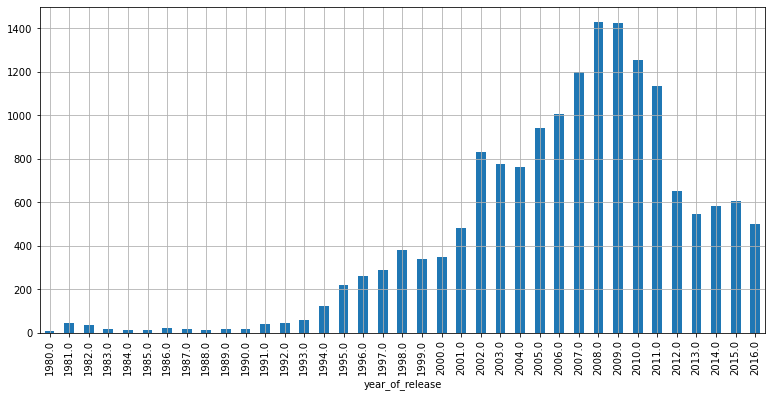

In [23]:
data.groupby('year_of_release')['name'].count().plot(kind='bar', figsize=(13, 6),grid = True)

<AxesSubplot:xlabel='year_of_release'>

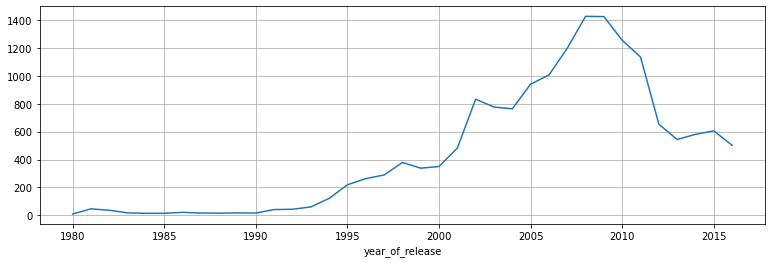

In [24]:
data.groupby('year_of_release')['name'].count().plot(grid=True,figsize=(13,4))

<i>На графике видно что продажи шли вверх до 2008-2009 годов, затем пошли на спад.<br>Также видно что до 1995 года количество игр в год было менее 200, а до 2001 года меньше 400, поэтому смотреть на данные до 2001 года не имеет смысла.</i>

<b><i>Посмотрим, как менялись продажи по платформам</i></b>

In [25]:
#Выберем платформы с наибольшими суммарными продажами.
platform_rating=data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(platform_rating.head())


platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64


<AxesSubplot:xlabel='platform'>

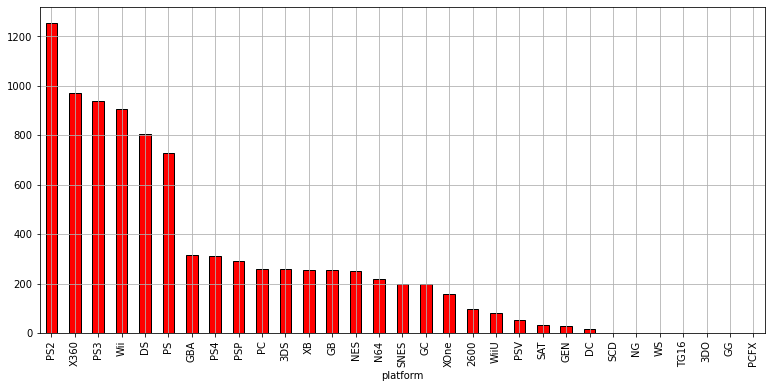

In [26]:
platform_rating.plot(kind='bar', figsize=(13, 6),grid = True, edgecolor = 'black',facecolor = 'red')

<i>Возьмем 6 платформ с самыми высокими продажами: PS2,X360,PS3,Wii,PS,DS</i>

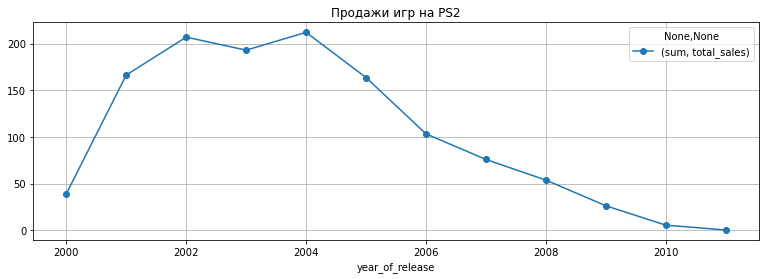

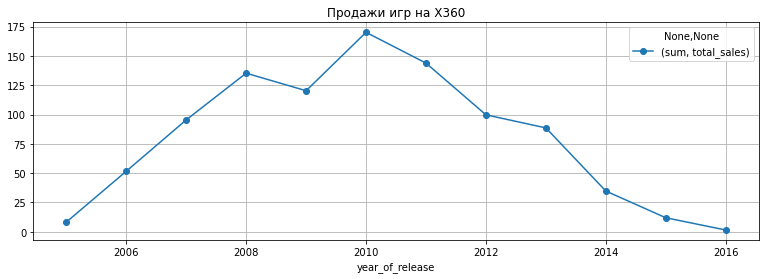

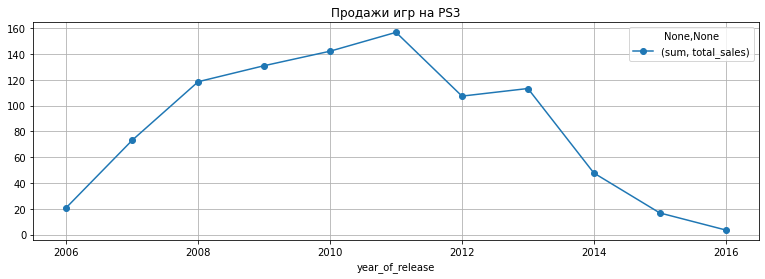

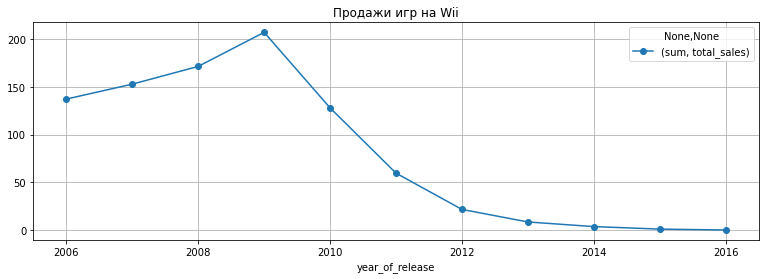

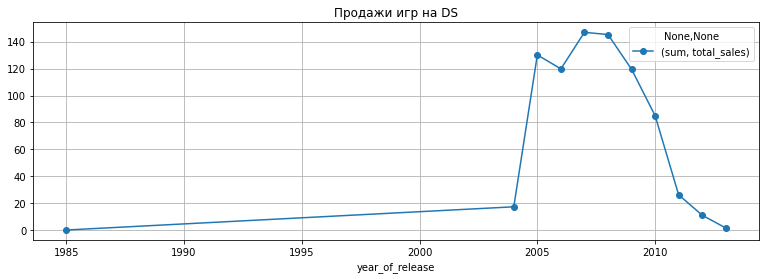

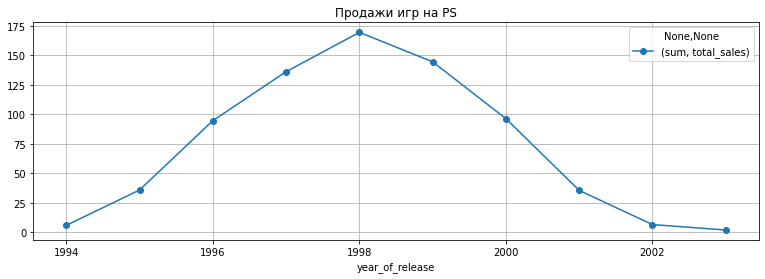

In [27]:
somelist = platform_rating.head(6).index.to_list()

for platform in somelist:
    (data.query('platform==@platform')
     .pivot_table(index=['year_of_release'], values=['total_sales'], aggfunc=['sum'])
     .plot(marker='o',grid=True,figsize=(13,4))
    )
    title = 'Продажи игр на ' + platform
    plt.title(title)

<i>По графикам видим, что среднее время жизни платформы - около 10 лет</i>

In [28]:
#Возьмем данные за актуалный период - 10 лет, т.е. с 2006 года
data_recent_decade=data.query('year_of_release>=2006').pivot_table(index=['platform'],values=['total_sales'], aggfunc=['sum'])
data_recent_decade.columns=['total_sales_sum']
data_recent_decade.sort_values(by='total_sales_sum',ascending =False, inplace=True)     

<AxesSubplot:xlabel='platform'>

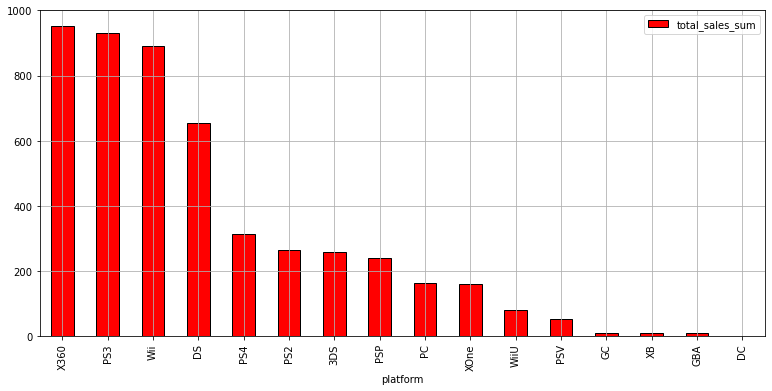

In [29]:
data_recent_decade.plot(kind='bar', figsize=(13, 6),grid = True, edgecolor = 'black',facecolor = 'red')

<i>По абсолютным продажам за последние 10 лет лидирует Xbox 360, PS3 и Wii. Но посмотрим данные в динамике, так как данные платформы могут находится уже на совоем закате</i>

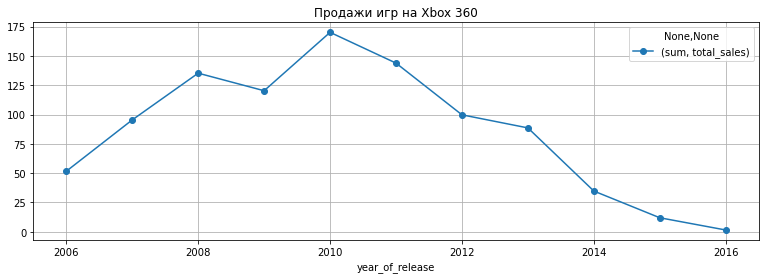

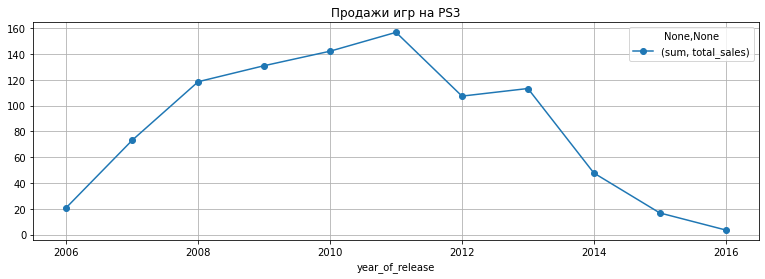

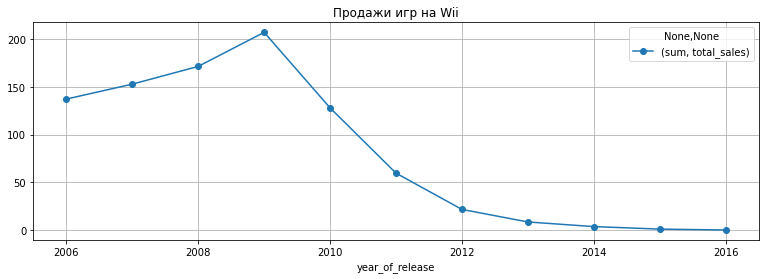

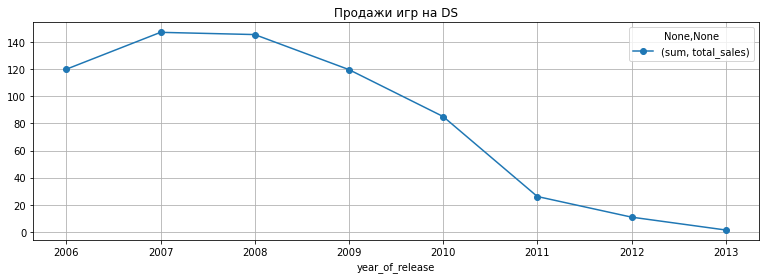

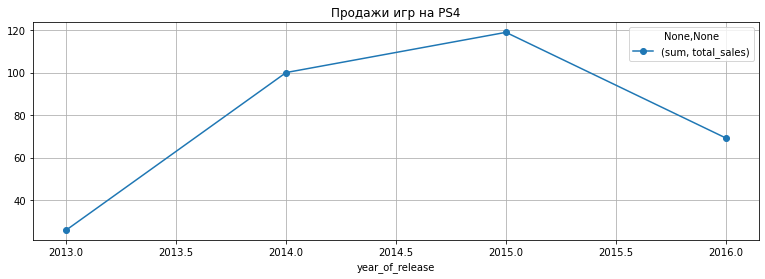

In [30]:
data.query('platform=="X360" and year_of_release>=2006').pivot_table(index=['year_of_release'], values=['total_sales'], aggfunc=['sum']).plot(marker='o',grid=True,figsize=(13,4))
plt.title('Продажи игр на Xbox 360')
data.query('platform=="PS3" and year_of_release>=2006').pivot_table(index=['year_of_release'], values=['total_sales'], aggfunc=['sum']).plot(marker='o',grid=True,figsize=(13,4))
plt.title('Продажи игр на PS3')
data.query('platform=="Wii" and year_of_release>=2006').pivot_table(index=['year_of_release'], values=['total_sales'], aggfunc=['sum']).plot(marker='o',grid=True,figsize=(13,4))
plt.title('Продажи игр на Wii')
data.query('platform=="DS" and year_of_release>=2006').pivot_table(index=['year_of_release'], values=['total_sales'], aggfunc=['sum']).plot(marker='o',grid=True,figsize=(13,4))
plt.title('Продажи игр на DS')
data.query('platform=="PS4" and year_of_release>=2006').pivot_table(index=['year_of_release'], values=['total_sales'], aggfunc=['sum']).plot(marker='o',grid=True,figsize=(13,4))
plt.title('Продажи игр на PS4')
plt.show()

<i>Все наши лидеры - "на закате карьеры", при рассмотрении графика за 10 лет.Поэтому разумно будет сузить интервал до 6 лет.</i>

In [31]:
data_recent_six_years=data.query('year_of_release>=2010').pivot_table(index=['platform'],values=['total_sales'], aggfunc=['sum'])
data_recent_six_years.columns=['total_sales_sum']
data_recent_six_years.sort_values(by='total_sales_sum',ascending =False, inplace=True)

<AxesSubplot:xlabel='platform'>

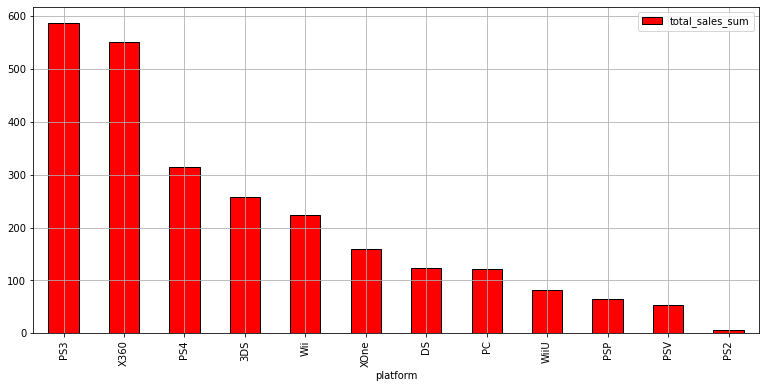

In [32]:
data_recent_six_years.plot(kind='bar', figsize=(13, 6),grid = True, edgecolor = 'black',facecolor = 'red')

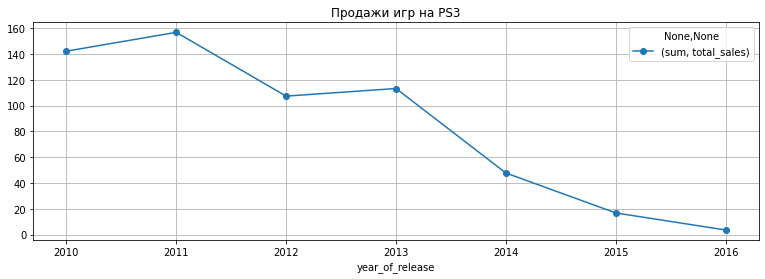

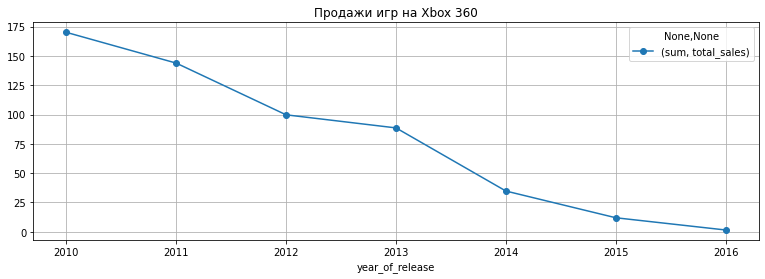

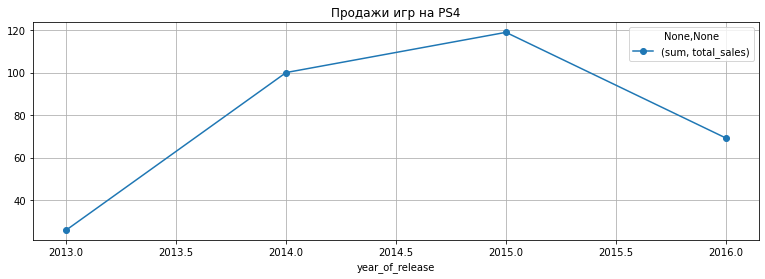

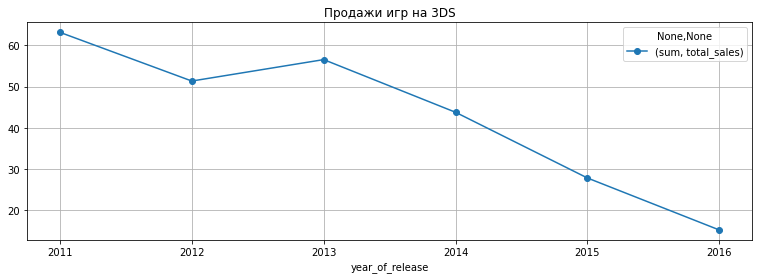

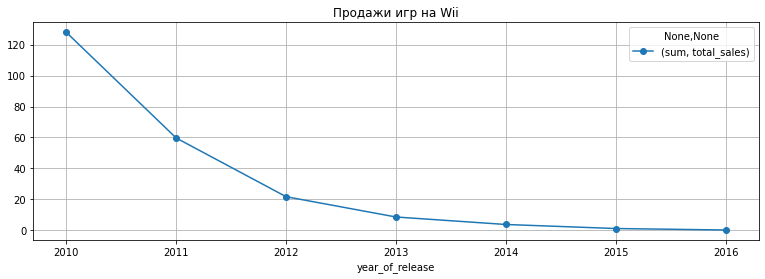

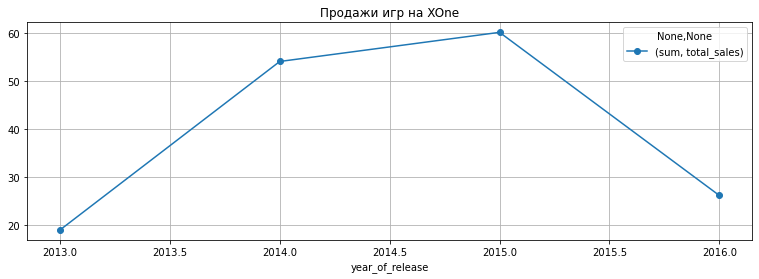

In [33]:

data.query('platform=="PS3" and year_of_release>=2010').pivot_table(index=['year_of_release'], values=['total_sales'], aggfunc=['sum']).plot(marker='o',grid=True,figsize=(13,4))
plt.title('Продажи игр на PS3')
data.query('platform=="X360" and year_of_release>=2010').pivot_table(index=['year_of_release'], values=['total_sales'], aggfunc=['sum']).plot(marker='o',grid=True,figsize=(13,4))
plt.title('Продажи игр на Xbox 360')
data.query('platform=="PS4" and year_of_release>=2010').pivot_table(index=['year_of_release'], values=['total_sales'], aggfunc=['sum']).plot(marker='o',grid=True,figsize=(13,4))
plt.title('Продажи игр на PS4')
data.query('platform=="3DS" and year_of_release>=2010').pivot_table(index=['year_of_release'], values=['total_sales'], aggfunc=['sum']).plot(marker='o',grid=True,figsize=(13,4))
plt.title('Продажи игр на 3DS')
data.query('platform=="Wii" and year_of_release>=2010').pivot_table(index=['year_of_release'], values=['total_sales'], aggfunc=['sum']).plot(marker='o',grid=True,figsize=(13,4))
plt.title('Продажи игр на Wii')
data.query('platform=="XOne" and year_of_release>=2010').pivot_table(index=['year_of_release'], values=['total_sales'], aggfunc=['sum']).plot(marker='o',grid=True,figsize=(13,4))
plt.title('Продажи игр на XOne')

plt.show()

<AxesSubplot:xlabel='platform'>

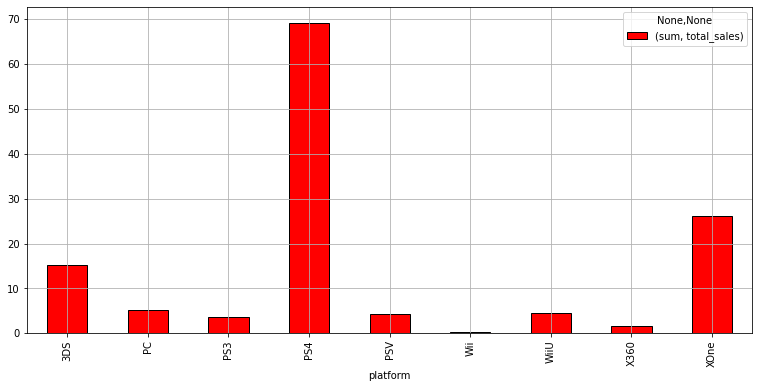

In [34]:
#Посмотрим данные за 2016 год.
data.query('year_of_release==2016').pivot_table(index=['platform'],values=['total_sales'], aggfunc=['sum']).plot(kind='bar', figsize=(13, 6),grid = True, edgecolor = 'black',facecolor = 'red')


<i><b>Итого мы видим, что большинство платформ с лучшими продажами угасают.XOne и PS4 только что прошли точку максимума,и еще долго будут показывать хорошие результаты. 3DS уже давно угасает, но пока на 3м месте.<br>Таким образом, подходящие прибыльные платформы на 2017 год- это PS4,XOne и 3DS. </i></b> 

<i>Построим диаграмму размаха по глобальным продажам игр в разбивке по платформам</i>

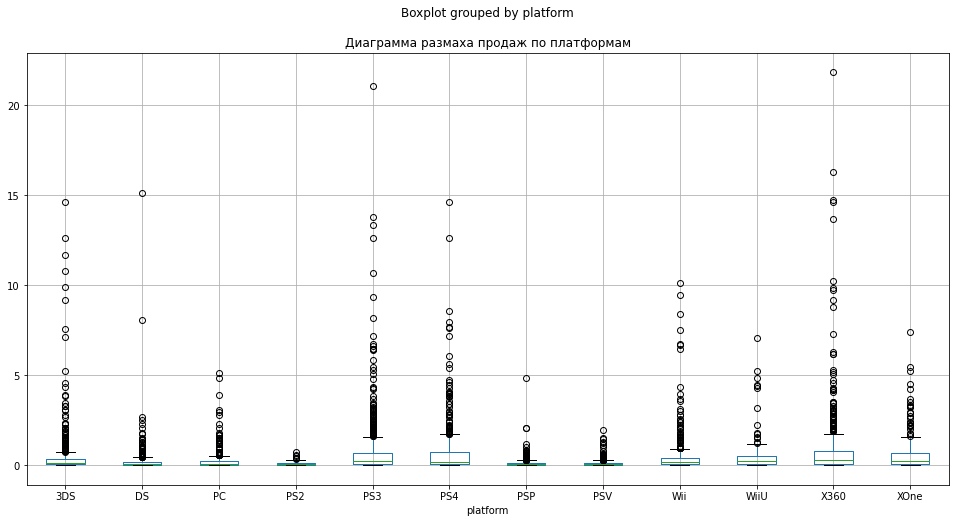

In [35]:

warnings.filterwarnings("ignore",category=np.VisibleDeprecationWarning)
data.query('year_of_release>=2010').boxplot(column='total_sales', by = 'platform', figsize = (16,8))
#plt.ylim(0, 2.4)
plt.title('Диаграмма размаха продаж по платформам')
plt.show()

<i>Посмотрим на диаграмму поближе</i>

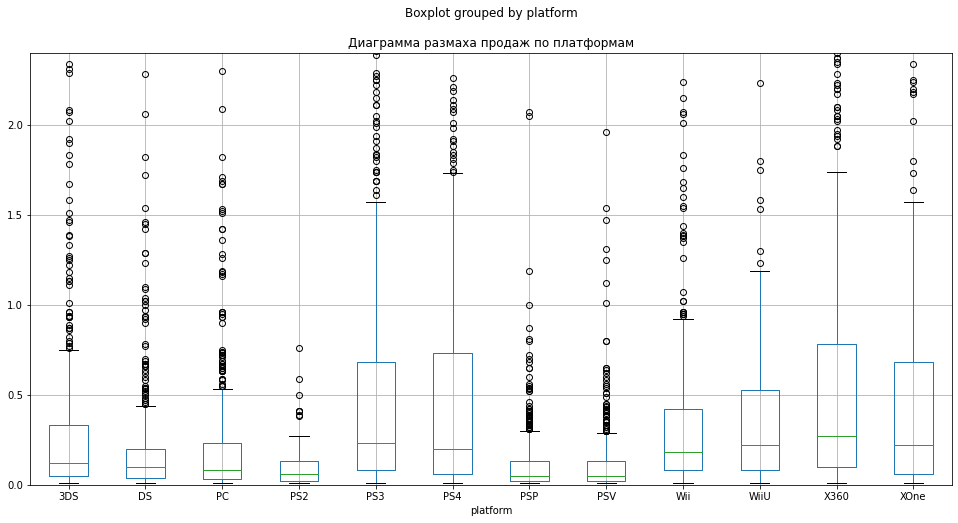

In [36]:
data.query('year_of_release>=2010').boxplot(column='total_sales', by = 'platform', figsize = (16,8))
plt.ylim(0, 2.4)
plt.title('Диаграмма размаха продаж по платформам')
plt.show()

In [37]:
data.query('year_of_release>=2010').groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,512.0,0.503535,1.441271,0.01,0.05,0.12,0.3325,14.60
DS,507.0,0.244083,0.815643,0.01,0.04,0.10,0.2000,15.13
PC,480.0,0.254813,0.530337,0.01,0.03,0.08,0.2300,5.14
PS2,45.0,0.135333,0.180638,0.01,0.02,0.06,0.1300,0.76
PS3,889.0,0.661125,1.459651,0.01,0.08,0.23,0.6800,21.05
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.7300,14.63
PSP,500.0,0.128100,0.288250,0.01,0.02,0.05,0.1325,4.87
PSV,429.0,0.125431,0.212341,0.01,0.02,0.05,0.1300,1.96
Wii,450.0,0.495489,1.118375,0.01,0.08,0.18,0.4200,10.12


<b><i>По распределению видим что в компьютерных играх характерны длинные хвосты. Стандартные отклонения в несколько раз больше медианы, и топовые игры могут продаваться до 100 раз успешней, чем средние. <br>Чем популярней платформа, тем выше может быть потенциальный выигрыш, поэтому имеет смысл разрабатывать больше игр для топовых приставок на сегодняшний день (Xbox One,PS4, 3DS) </i></b>

<i>Посмотрим, как влияют на продажи внутри одной из полулярных платформ отзывы пользователей и критиков. Возьмем для этого PS4</i>

Text(0.5, 1.0, 'Зависимость продажи игр на PS4 от отзывов пользователей')

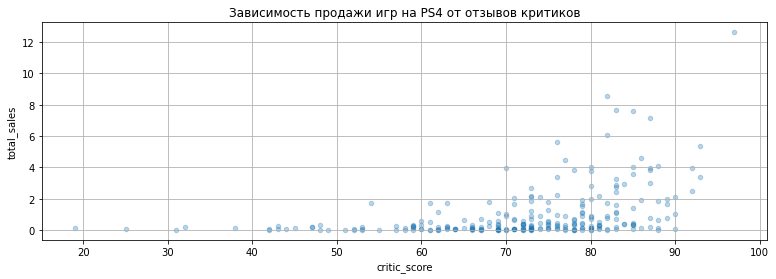

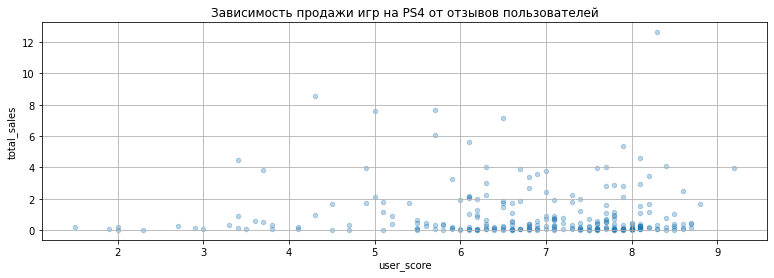

In [38]:
PS4_recent_six_years = data.query('platform=="PS4" and year_of_release>=2010')
#Построим диаграммы рассеяния
PS4_recent_six_years.plot(x='critic_score', y = 'total_sales', kind = 'scatter', alpha=0.3, figsize=(13,4),grid = True)
plt.title('Зависимость продажи игр на PS4 от отзывов критиков')
PS4_recent_six_years.plot(x='user_score', y = 'total_sales', kind = 'scatter', alpha=0.3, figsize=(13,4),grid = True)
plt.title('Зависимость продажи игр на PS4 от отзывов пользователей')

In [39]:
print('Коэффициент корреляции оценки критиков и продаж',PS4_recent_six_years['critic_score'].corr(PS4_recent_six_years['total_sales']))
print('Коэффициент корреляции оценки пользователей и продаж',PS4_recent_six_years['user_score'].corr(PS4_recent_six_years['total_sales']))

Коэффициент корреляции оценки критиков и продаж 0.40656790206178095
Коэффициент корреляции оценки пользователей и продаж -0.031957110204556424


<i>Исходя из полученных данных, корреляция между оценкой критиков и продажами умеренная, а между оценкой пользователей и продажами слабая. Посмотрим то же для платформ: XBOX ONE и 3D.S</i>

Text(0.5, 1.0, 'Зависимость продажи игр на XOne от отзывов пользователей')

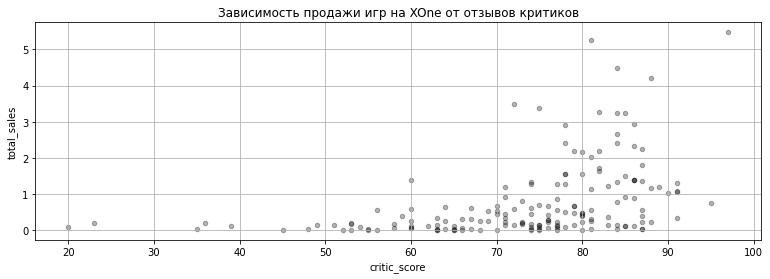

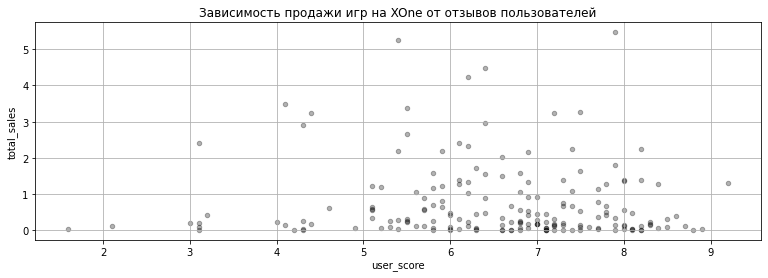

In [40]:
XOne_recent_six_years = data.query('platform=="XOne" and year_of_release>=2010')

#plot(x='marker='o',grid=True,figsize=(13,4))
XOne_recent_six_years.plot(x='critic_score', y = 'total_sales', kind = 'scatter', alpha=0.3, figsize=(13,4),grid = True, color ='black')
plt.title('Зависимость продажи игр на XOne от отзывов критиков')
XOne_recent_six_years.plot(x='user_score', y = 'total_sales', kind = 'scatter', alpha=0.3, figsize=(13,4),grid = True, color ='black')
plt.title('Зависимость продажи игр на XOne от отзывов пользователей')

In [41]:
print('Коэффициент корреляции оценки критиков и продаж',XOne_recent_six_years['critic_score'].corr(XOne_recent_six_years['total_sales']))
print('Коэффициент корреляции оценки пользователей и продаж',XOne_recent_six_years['user_score'].corr(XOne_recent_six_years['total_sales']))

Коэффициент корреляции оценки критиков и продаж 0.4169983280084017
Коэффициент корреляции оценки пользователей и продаж -0.06892505328279414


Text(0.5, 1.0, 'Зависимость продажи игр на 3DS от отзывов пользователей')

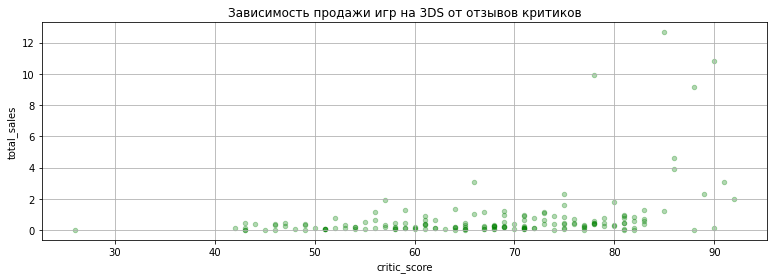

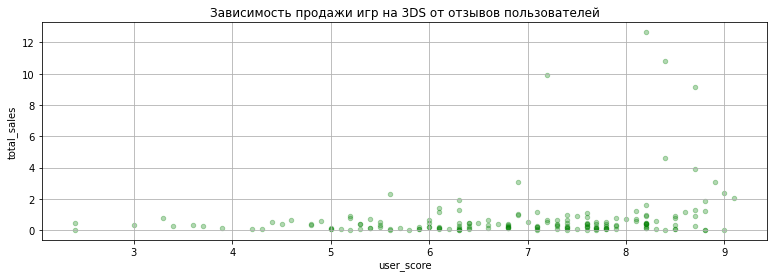

In [42]:
DS3_recent_six_years = data.query('platform=="3DS" and year_of_release>=2010')

#plot(x='marker='o',grid=True,figsize=(13,4))
DS3_recent_six_years.plot(x='critic_score', y = 'total_sales', kind = 'scatter', alpha=0.3, figsize=(13,4),grid = True, color ='green')
plt.title('Зависимость продажи игр на 3DS от отзывов критиков')

DS3_recent_six_years.plot(x='user_score', y = 'total_sales', kind = 'scatter', alpha=0.3, figsize=(13,4),grid = True, color ='green')
plt.title('Зависимость продажи игр на 3DS от отзывов пользователей')

In [43]:
print('Коэффициент корреляции оценки критиков и продаж',DS3_recent_six_years['critic_score'].corr(DS3_recent_six_years['total_sales']))
print('Коэффициент корреляции оценки пользователей и продаж',DS3_recent_six_years['user_score'].corr(DS3_recent_six_years['total_sales']))

Коэффициент корреляции оценки критиков и продаж 0.3487397305984834
Коэффициент корреляции оценки пользователей и продаж 0.22207843643390882


<i>Как видим, ситуация для PS4 и XOne похожая, т.е. слабая связь между отзывами критиков и продажами, нулевая связь между отзывами пользователей и продажами..ДЛя платформы 3DS связь отзывов критиков и продаж тоже слабая, но отзывы пользователей уже влиюят, хотя тоже слабо. Т.к. платформа 3DS технологически другая, возможно другая аудитория ей пользуется, и от этого разница.<br>Также для всех трех платформ, видим при высоком рейтинге критиков продажи наиболее высоки, могут быть рекордными. Это означает, если сделать хорошую игрую, у нее будут высокие продажи, критики дадут хорошую оценку, что еще выше поднимет продажу, т.е. будет круговорот успеха.</i>

<div class="alert alert-success">
    
<b> Комментарий от ревьюера</b>
    
Ты правильно определил зависимость продаж от оценок
</div>


<i>Посмотрим на самые прибыльные жанры</i>

<AxesSubplot:xlabel='genre'>

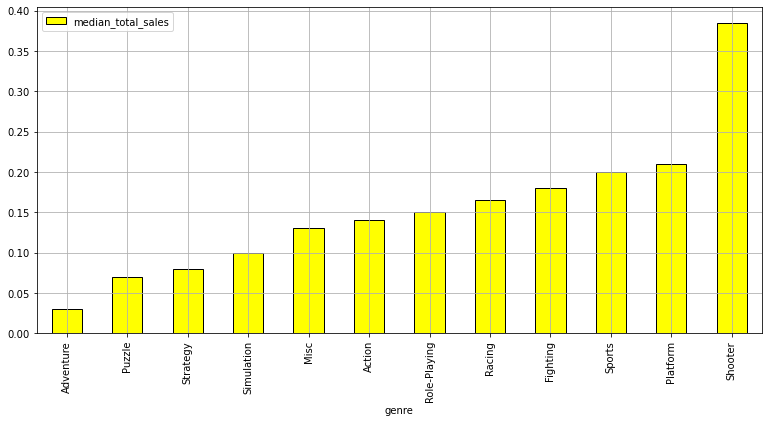

In [44]:
top_genres=data.query('year_of_release>=2010').pivot_table(index=['genre'], values='total_sales',aggfunc=['median'])
top_genres.columns =['median_total_sales'] 
top_genres.sort_values(by='median_total_sales').plot(kind='bar', figsize=(13, 6),grid = True, edgecolor = 'black',facecolor = 'yellow')                                                          

<i><b>Самый прибыльный жанр по медианным продажам - Shooter. Самый низкоприбыльный - Adventure</b></i>

## Портрет пользователя каждого региона

In [45]:
#Посмотрим самые популярные платформы для каждого региона
top_platform_region=data.query('year_of_release>=2010').pivot_table(index=['platform'], values=['na_sales','eu_sales','jp_sales'],aggfunc=['sum'])
display(top_platform_region)
top_platform_region.columns =['sum_eu_sales','sum_jp_sales','sum_na_sales'] 
display(top_platform_region)
print('Топ-5 платформ по количеству продаж в Серевной Америке:')
display(top_platform_region.sort_values(by='sum_na_sales', ascending = False)['sum_na_sales'].head())
print()
print('Топ-5 платформ по количеству продаж в Европе:')
display(top_platform_region.sort_values(by='sum_eu_sales', ascending = False)['sum_eu_sales'].head())
print()
print('Топ-5 платформ по количеству продаж в Японии:')
display(top_platform_region.sort_values(by='sum_jp_sales', ascending = False)['sum_jp_sales'].head())
print()

sum                  
         eu_sales jp_sales na_sales
platform                           
3DS         61.27   100.62    82.65
DS          28.06    27.90    59.66
PC          69.07     0.00    39.13
PS2          1.67     0.80     2.32
PS3        213.60    59.26   229.25
PS4        141.09    15.96   108.74
PSP          7.59    42.20     9.65
PSV         13.07    21.84    12.47
Wii         65.91    17.75   121.20
WiiU        25.13    13.01    38.10
X360       163.45     5.46   334.18
XOne        51.59     0.34    93.12

,sum_eu_sales,sum_jp_sales,sum_na_sales
platform,,,
3DS,61.27,100.62,82.65
DS,28.06,27.90,59.66
PC,69.07,0.00,39.13
PS2,1.67,0.80,2.32
PS3,213.60,59.26,229.25
PS4,141.09,15.96,108.74
PSP,7.59,42.20,9.65
PSV,13.07,21.84,12.47
Wii,65.91,17.75,121.20


Топ-5 платформ по количеству продаж в Серевной Америке:


platform
X360    334.18
PS3     229.25
Wii     121.20
PS4     108.74
XOne     93.12
Name: sum_na_sales, dtype: float64


Топ-5 платформ по количеству продаж в Европе:


platform
PS3     213.60
X360    163.45
PS4     141.09
PC       69.07
Wii      65.91
Name: sum_eu_sales, dtype: float64


Топ-5 платформ по количеству продаж в Японии:


platform
3DS    100.62
PS3     59.26
PSP     42.20
DS      27.90
PSV     21.84
Name: sum_jp_sales, dtype: float64

<i><b>1.В каждом регионе ТОП-5 похож: везде присутствует PS3. А вот XBOX One и XboX 360 в Японии не поплуярен, так как в Серевной Америке и Европе. Возомжно, для американского XBOX есть какие-либо препятствия на рынке в Японии (пошлины, плюс много своих производителей)  <br> 2.Европа единственный рынок, где присутствует PC в топ-5 платформ <br>3.В Японии на 1м месте платформа 3DS, которая принципиально отличается от других игровых приставок (переносная).Вообще в японском списке все платформы в топ японские.</i></b>

In [46]:
#Посмотрим самые популярные жанры для каждого региона
top_genres_region=data.query('year_of_release>=2010').pivot_table(index=['genre'], values=['na_sales','eu_sales','jp_sales'],aggfunc=['sum'])
display(top_genres_region)
top_genres_region.columns =['sum_eu_sales','sum_jp_sales','sum_na_sales'] 
display(top_genres_region)
print('Топ-5 жанров по количеству продаж в Серевной Америке:')
display(top_genres_region.sort_values(by='sum_na_sales', ascending = False)['sum_na_sales'].head())
print()
print('Топ-5 жанров по количеству продаж в Европе:')
display(top_genres_region.sort_values(by='sum_eu_sales', ascending = False)['sum_eu_sales'].head())
print()
print('Топ-5 жанров по количеству продаж в Японии:')
display(top_genres_region.sort_values(by='sum_jp_sales', ascending = False)['sum_jp_sales'].head())

sum                  
             eu_sales jp_sales na_sales
genre                                  
Action         233.88    72.20   290.70
Adventure       18.88    15.67    20.84
Fighting        20.33    13.90    39.05
Misc            66.09    24.29   123.80
Platform        38.30    15.81    54.90
Puzzle           6.58     3.40     9.10
Racing          54.79     6.68    46.11
Role-Playing    75.48   103.54   112.05
Shooter        171.45    14.04   237.47
Simulation      26.39    13.30    26.39
Sports         116.84    15.51   156.81
Strategy        12.49     6.80    13.25

,sum_eu_sales,sum_jp_sales,sum_na_sales
genre,,,
Action,233.88,72.20,290.70
Adventure,18.88,15.67,20.84
Fighting,20.33,13.90,39.05
Misc,66.09,24.29,123.80
Platform,38.30,15.81,54.90
Puzzle,6.58,3.40,9.10
Racing,54.79,6.68,46.11
Role-Playing,75.48,103.54,112.05
Shooter,171.45,14.04,237.47


Топ-5 жанров по количеству продаж в Серевной Америке:


genre
Action          290.70
Shooter         237.47
Sports          156.81
Misc            123.80
Role-Playing    112.05
Name: sum_na_sales, dtype: float64


Топ-5 жанров по количеству продаж в Европе:


genre
Action          233.88
Shooter         171.45
Sports          116.84
Role-Playing     75.48
Misc             66.09
Name: sum_eu_sales, dtype: float64


Топ-5 жанров по количеству продаж в Японии:


genre
Role-Playing    103.54
Action           72.20
Misc             24.29
Platform         15.81
Adventure        15.67
Name: sum_jp_sales, dtype: float64

<i><b>1.Топ 5-жанров в Северной Америке и Европе одинаковы и идут в том же порядке, кроме Misc.<br>2.В Японии На первом месте Role-Playing и популярен Adventure, который не входит в топ-5 в Северной Америке и Японии<br>3.В Японии Shooter Не входит в 1ю пятерку, хотя очень популярен в Европе и  Северной Америке.<br>Вероятно, разица связана с разными платформами, который используют в Европе и других рынках.</i></b>

In [47]:
#Посмотрим как рейтинг ESRB На продажи в отдельном регионе
data.rating.value_counts()

RP      6767
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
AO         1
Name: rating, dtype: int64

In [48]:
top_rating_region=data.query('year_of_release>=2010').pivot_table(index=['rating'], values=['na_sales','eu_sales','jp_sales'],aggfunc=['sum'])
display(top_rating_region)
top_rating_region.columns =['sum_eu_sales','sum_jp_sales','sum_na_sales'] 
display(top_rating_region.head())
print('Рейтинг ассоциации ESRB и продажи в СА:')
display(top_rating_region.sort_values(by='sum_na_sales', ascending = False)['sum_na_sales'])
print('Рейтинг ассоциации ESRB и продажи в Европе:')
display(top_rating_region.sort_values(by='sum_eu_sales', ascending = False)['sum_eu_sales'])
print('Рейтинг ассоциации ESRB и продажи в Японии:')
display(top_rating_region.sort_values(by='sum_jp_sales', ascending = False)['sum_jp_sales'])

sum                  
       eu_sales jp_sales na_sales
rating                           
E        197.34    47.87   271.15
E10+      99.28    13.22   159.38
EC         0.00     0.00     1.13
M        292.29    30.45   382.28
RP       139.51   171.49   155.72
T        113.08    42.11   160.81

,sum_eu_sales,sum_jp_sales,sum_na_sales
rating,,,
E,197.34,47.87,271.15
E10+,99.28,13.22,159.38
EC,0.00,0.00,1.13
M,292.29,30.45,382.28
RP,139.51,171.49,155.72


Рейтинг ассоциации ESRB и продажи в СА:


rating
M       382.28
E       271.15
T       160.81
E10+    159.38
RP      155.72
EC        1.13
Name: sum_na_sales, dtype: float64

Рейтинг ассоциации ESRB и продажи в Европе:


rating
M       292.29
E       197.34
RP      139.51
T       113.08
E10+     99.28
EC        0.00
Name: sum_eu_sales, dtype: float64

Рейтинг ассоциации ESRB и продажи в Японии:


rating
RP      171.49
E        47.87
T        42.11
M        30.45
E10+     13.22
EC        0.00
Name: sum_jp_sales, dtype: float64

<i><b>1.В Северной Америке и Европе ситация очень похожая, высший рейтинг у игр "M", т.е. от 17 и старше, низший у 10+ во всех региона.<br>2.В Японии высший рейтинг у игр "RP", на втором "E", т.е. Early Childhood, на 3м месте "T" - teens. Видимо в Японии какое то другое законодательство по оценке возраста игр, другой ценз. <br>Видим, что в Японии рынок видеоигр отличается, с уклоном в сторону младшей аудитории<br>Соответсвенно, рейтинг ESRB влияет на продажи в Европе и Северной Америке, но не Японии.</b></i>

## Проверка гипотез

<i><b>Проверим гипотезу что средний пользовательский рейтинг платформ Xbox One и PC одинаковый"</i></b>

In [49]:
#создадим Датасет только с платформами XBox One и PC
data_Xbox_One = data.query('year_of_release>=2010 and platform =="XOne"')['user_score']
data_PC = data.query('year_of_release>=2010 and platform =="PC"')['user_score']
#data_Xbox_One = data.query('platform =="XOne"')['user_score']
#data_PC = data.query('platform =="PC"')['user_score']

#Удалим пропуски в виде NaN
data_Xbox_One.dropna(inplace=True)
data_PC.dropna(inplace=True)

<ipython-input-49-383f1cf8600f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Xbox_One.dropna(inplace=True)
<ipython-input-49-383f1cf8600f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_PC.dropna(inplace=True)


<i>Нулевая гипотеза: Cредний пользовательский рейтинг платформ Xbox One и PC одинаковый".<br>
Альтернативная гипотеза: Cредний пользовательский рейтинг платформы Xbox One и PC отличаются".</i>

In [50]:
alpha = .05
results = st.ttest_ind(data_Xbox_One, data_PC, equal_var = False, axis=0)
print('p-значение:',results.pvalue)

p-значение: 0.9875445680344214


In [51]:
if (results.pvalue< alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print ("Принимаем нулевую гипотезу")

Принимаем нулевую гипотезу


<i><b>Нулевую гипотезу "Cредний пользовательский рейтинг платформ Xbox One и PC одинаковый" принимаем.</i></b>

<i><b>Проверим гипотезу что средние пользовательские рейтинги жанров Action и Sports рызные:</i></b>

In [52]:
#создадим Датасет только с жанрами Action и Sports
data_action = data.query('year_of_release>=2010 and genre =="Action"')['user_score']
data_sports = data.query('year_of_release>=2010 and genre =="Sports"')['user_score']
#display(data_Xbox_One)
#display(data_PC)
data_action.dropna(inplace=True)
data_sports.dropna(inplace=True)
data_action.isnull().mean()
data_sports.isnull().mean()


<ipython-input-52-0ddff90d1e4d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_action.dropna(inplace=True)
<ipython-input-52-0ddff90d1e4d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sports.dropna(inplace=True)


0.0

<i>Нулевая гипотеза: Cредний пользовательский рейтинг жанров Action и Sports одинаковый.<br>
Альтернативная гипотеза: Cредний пользовательский жанра Action отличается от жанра Sports.</i>

In [53]:
alpha = .05
results = st.ttest_ind(data_action, data_sports, equal_var = False)
print('p-значение:',results.pvalue)

p-значение: 1.2434186251161608e-15


In [54]:
if (results.pvalue< alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print ("Принимаем нулевую гипотезу")

Отвергаем нулевую гипотезу


<i><b>Нулевую гипотезу отвергаем. Альтернативную гипотезу "Cредний пользовательский жанра Action отличается от жанра Sports" принимаем</i></b>

## Общий вывод

<b><i>1.При палинировании компании на 2017 год лучше сосредоточиться на самых прибыльных платформах - PS4, XOne и 3DS.<br>2.Нужно дифференцировать стратегию для рынка СА и Европы от рынка Японии, так как там разные платформы и разные целевые аудитории покупают больше всего. Также эти ранки разные по жанрам. <br> 3. Следует учитыват 10-летний цикл популярности платформ. Это значит, что в ближайшей перспективе 2-3 лет мы можем вкладывать в рекламу PS4,Xone и 3DS, но 3DS уже на закате, а PS4 и XOne только прошли пик и начинают спад. На подходе новые платформы или те что вышли недавно "поджимают" предыдущие. Поэтому в конце каждого года или в худшем случае двух надо пересматривать данные и стратегию. 
    </b></i>